   
<h1>The images are from Edureka youtube video explaining linear regression,click the link below to go to video:</h1> 
<a href="https://youtu.be/dQw4w9WgXcQ">click here</a> 
<br>
<a href="https://www.youtube.com/watch?v=E5RjzSK0fvY&t=1298s">or here</a>

<img src="linear regression/1.png" alt="Italian Trulli"> 
<img src="linear regression/2.png" alt="Italian Trulli"> 
<img src="linear regression/3.png" alt="Italian Trulli"> 
<img src="linear regression/4.png" alt="Italian Trulli">  
<img src="linear regression/6.png" alt="Italian Trulli">  
<img src="linear regression/7.png" alt="Italian Trulli"> 
<img src="linear regression/8.png" alt="Italian Trulli">  
<img src="linear regression/9.png" alt="Italian Trulli"> 
<img src="linear regression/10.png" alt="Italian Trulli"> 
<img src="linear regression/11.png" alt="Italian Trulli"> 
<img src="linear regression/12.png" alt="Italian Trulli">  
<img src="linear regression/13.jpg" alt="Italian Trulli">  
<img src="linear regression/14.gif" alt="Italian Trulli">  
<img src="linear regression/15.png" alt="Italian Trulli"> 
<img src="linear regression/16.png" alt="Italian Trulli"> 

<h3>Importing libraries and reading excel file(csv) </h3>

In [4]:
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
#plt.rcparams['figure.figsize'] = (20.0,10.0)  

data = pd.read_csv('../excel/homepricesmult.csv') 
print(data.shape) 
data




(6, 4)


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
med =data.bedrooms.median()
data.bedrooms = data.bedrooms.fillna(med)
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
X = data['area'].values 
Y = data['price'].values

<h1>1) First Method: </h1>
<h1>Implementing linear regression manually (no sci-kit learn) </h1>

In [9]:
#Calculating the mean of x and y
mean_x = np.mean(X) 
mean_y = np.mean(Y) 

#Total number of values 
m = len(X)
#using the formula to calculate b1(slope of regression line) and b2(coefficient of regression line)
numerator = 0 
denomator = 0 
for i in range(m): 
    numerator += (X[i] - mean_x) * (Y[i] - mean_y) 
    denomator += (X[i] - mean_x) ** 2 
b1 = numerator / denomator # slope of regression line
b0 = mean_y - (b1 * mean_x) #y-intercept of regression line

# print coefficients 
print(b1.round(),b0.round())

167.0 76692.0


<h3>Plotting the regression line for the data</h3>

[2600.         2651.72413793 2703.44827586 2755.17241379 2806.89655172
 2858.62068966 2910.34482759 2962.06896552 3013.79310345 3065.51724138
 3117.24137931 3168.96551724 3220.68965517 3272.4137931  3324.13793103
 3375.86206897 3427.5862069  3479.31034483 3531.03448276 3582.75862069
 3634.48275862 3686.20689655 3737.93103448 3789.65517241 3841.37931034
 3893.10344828 3944.82758621 3996.55172414 4048.27586207 4100.        ]
The predicted value for area = 3013.793103448276 is y= 580928.7400658398


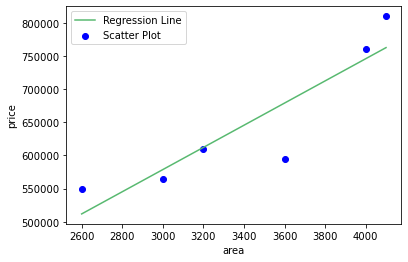

In [10]:
#plotting values and regression line
max_x = np.max(X) 
min_x = np.min(X)  

#Calculating line values x and y 
x = np.linspace(min_x, max_x, 30) #displaying 30 values between min X and max X
print(x)
y = b0 + b1 * x 
#we have area = 3013.79310345 at index 8 of x,let's display the predicted value y(price) for it
print("The predicted value for area =",x[8],"is y=",y[8])

#plotting line 
plt.plot(x,y,color='#58b970',label='Regression Line') 
#plotting scatter points 
plt.scatter(X,Y, c='blue', label='Scatter Plot')

plt.xlabel('area')
plt.ylabel('price') 
plt.legend() 
plt.show()

<h3> calculating r2 (the mean square error)</h3>

In [11]:
ss_t = 0 
ss_r = 0 
for i in range(m): 
    y_pred = b0 + b1 * X[i] 
    ss_t += (Y[i] - mean_y) ** 2 
    ss_r += (Y[i] - y_pred) ** 2 
r2 = 1 - (ss_r/ss_t) 
print(r2)


0.8126597526459411


<h1>2nd Method: </h1>
<h1>Now we implement linear regression automatically using the built-in functions found in sci-kit learn </h1>

In [12]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 

# cannot use rank 1 matrix in scikit learn 
X = X.reshape((m,1)) 
print(X,type(X))

[[2600]
 [3000]
 [3200]
 [3600]
 [4000]
 [4100]] <class 'numpy.ndarray'>


In [13]:
#creating model 
reg = LinearRegression()
#Fitting training data 
reg = reg.fit(X,Y) 
# Y Prediction 
Y_pred = reg.predict(X)  
print("The predictions are:")
print(Y_pred)
#Calculating R2 score 
r2_score = reg.score(X,Y) 
print("The mean square error is:")
print(r2_score)


The predictions are:
[511697.20347155 578621.02217936 612082.93153327 679006.75024108
 745930.56894889 762661.52362584]
The mean square error is:
0.8126597526459413
